we are going to work  on the heart disease dataset , this time we will use logistic regression to predict if a patient will have TenyearsCHD 

1. Apply logistic regression. 

2. Use a confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.
 

In [1]:
import pandas as pd
df =pd.read_csv("C:\\Users\\HP\\Downloads\\logistic_regression_dataset.csv")
df.head()
df.isnull().sum()
df =df.dropna(axis=0, how="any")
df.isnull().sum()
df.head()



,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = df[['age']]
y = df['TenYearCHD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=0)  

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.85


<Axes: xlabel='age', ylabel='TenYearCHD'>

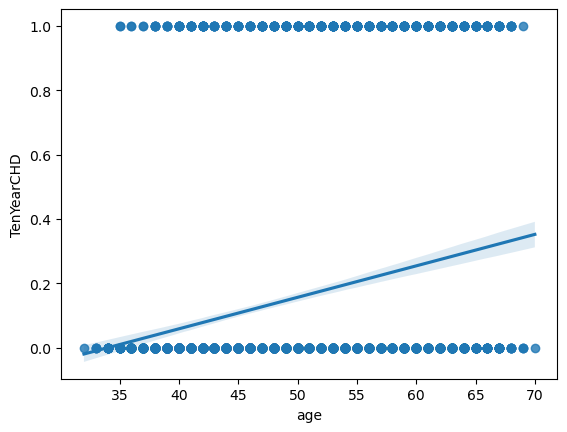

In [3]:
import seaborn as sns
sns.regplot(x='age',y='TenYearCHD',data=df)

In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1748
         1.0       0.00      0.00      0.00       301

    accuracy                           0.85      2049
   macro avg       0.43      0.50      0.46      2049
weighted avg       0.73      0.85      0.79      2049



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC - ROC Curve
In classification, there are many different evaluation metrics. The most popular is accuracy, which measures how often the model is correct.